In [40]:
%load_ext autoreload
%autoreload 2

from sympy import *
from safe_region_utils import *
init_printing()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ACAS X Example

## Define a polygon

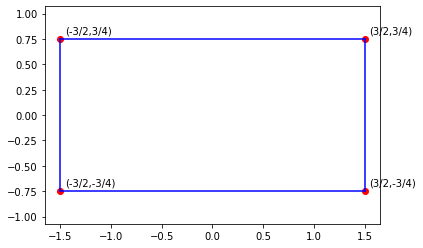

In [41]:
w = 0.75
rect_points: list = [
    geometry.Point(val)
    for val in [[2 * w, -w], [2 * w, w], [-2 * w, w], [-2 * w, -w]]
]
rectangle: geometry.Polygon = Polygon(*rect_points)
plot_polygon(rectangle)

## Define a trajectory

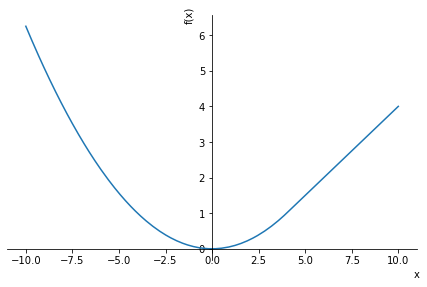

In [42]:
x, y = symbols("x y")

traj_piecewise = Piecewise(
                    (x**2 / 16, x < 4),
                    (x/2 - 1, x >= 4))
plot(traj_piecewise)

## Define domain and plotting bounds

In [43]:
domain = Interval(-6, 15)
xbounds = (domain.inf-3, domain.sup+3)
ybounds = (-2, 9)

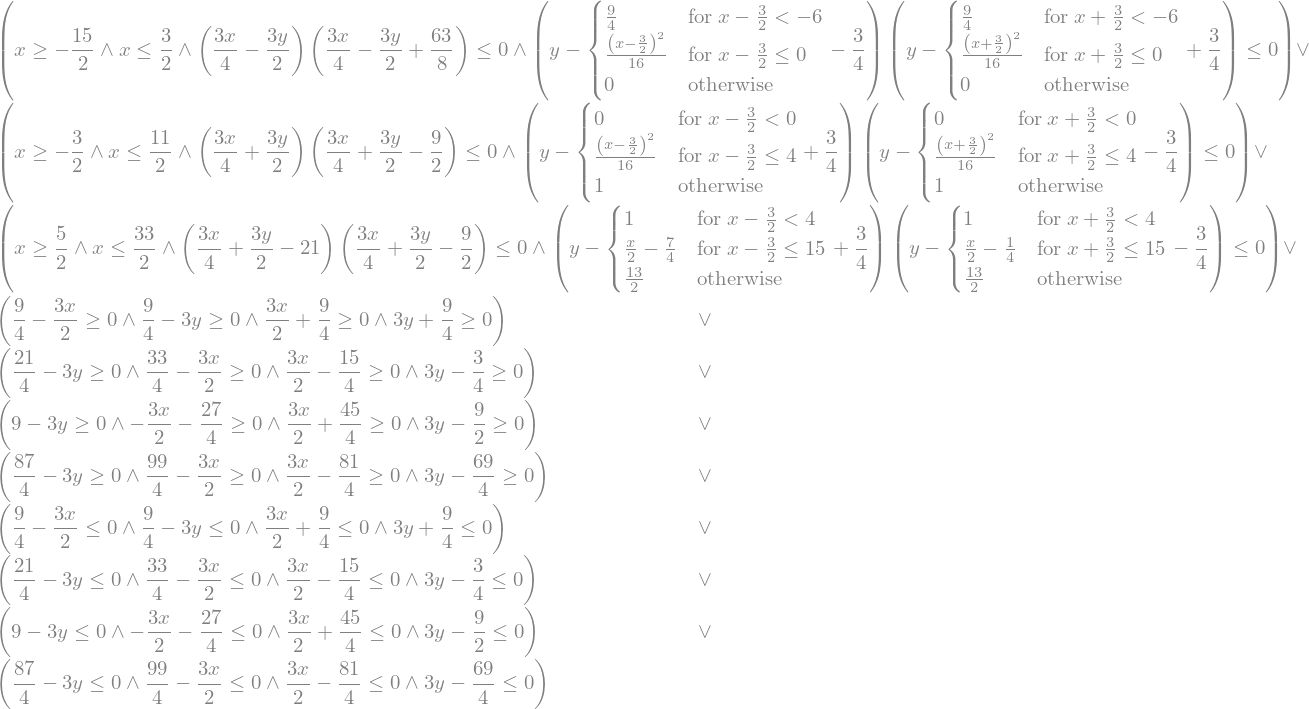

In [44]:
example_name = "ACAS X Climb with Rectangle"

cond = plot_safe_grid_piecewise(
    x, y,
    rectangle,
    traj_piecewise,
    domain = domain, 
)
cond

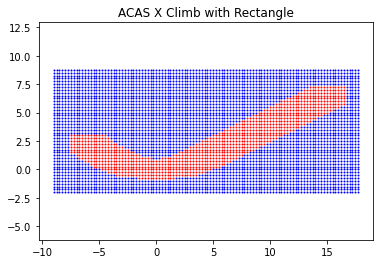


Show[
    RegionPlot[((9/4 - 3*x/2 >= 0) && (9/4 - 3*y >= 0) && (3*x/2 + 9/4 >= 0) && (3*y + 9/4 >= 0)) || ((21/4 - 3*y >= 0) && (33/4 - 3*x/2 >= 0) && (3*x/2 - 15/4 >= 0) && (3*y - 3/4 >= 0)) || ((9 - 3*y >= 0) && (-3*x/2 - 27/4 >= 0) && (3*x/2 + 45/4 >= 0) && (3*y - 9/2 >= 0)) || ((87/4 - 3*y >= 0) && (99/4 - 3*x/2 >= 0) && (3*x/2 - 81/4 >= 0) && (3*y - 69/4 >= 0)) || ((9/4 - 3*x/2 <= 0) && (9/4 - 3*y <= 0) && (3*x/2 + 9/4 <= 0) && (3*y + 9/4 <= 0)) || ((21/4 - 3*y <= 0) && (33/4 - 3*x/2 <= 0) && (3*x/2 - 15/4 <= 0) && (3*y - 3/4 <= 0)) || ((9 - 3*y <= 0) && (-3*x/2 - 27/4 <= 0) && (3*x/2 + 45/4 <= 0) && (3*y - 9/2 <= 0)) || ((87/4 - 3*y <= 0) && (99/4 - 3*x/2 <= 0) && (3*x/2 - 81/4 <= 0) && (3*y - 69/4 <= 0)) || ((x >= 5/2) && (x <= 33/2) && ((3*x/4 + 3*y/2 - 21)*(3*x/4 + 3*y/2 - 9/2) <= 0) && ((y - Piecewise[{{1, x - 3/2 < 4}, {x/2 - 7/4, x - 3/2 <= 15}, {13/2, True}}] + 3/4)*(y - Piecewise[{{1, x + 3/2 < 4}, {x/2 - 1/4, x + 3/2 <= 15}, {13/2, True}}] - 3/4) <= 0)) || ((x >= -15/2

In [45]:
plot_condition(x, y, cond, xbounds, ybounds, title=example_name)
mathematica_output = print_mathematica(x, y, cond, xbounds, ybounds, traj_piecewise, rectangle)
print(mathematica_output)

# UAV top-down collision avoidance

## Define a polygon

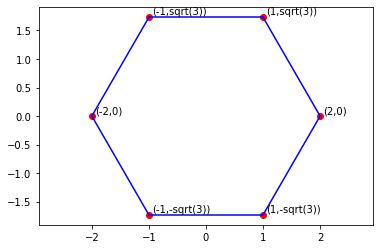

In [46]:
rp = 2
hexagon = RegularPolygon(Point(0, 0), rp, 6)

plot_polygon(hexagon)

## Define a trajectory

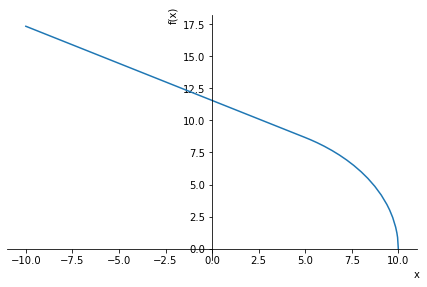

In [47]:
R = 10
theta = pi/3
# y = sqrt(R**2 - x**2)
bound = R / sqrt(tan(theta)**2 + 1)

traj_piecewise = Piecewise(
                    (sqrt(R**2 - x**2), x > bound),
                    (-1/tan(theta)*(x-R*cos(theta)) + R*sin(theta), x <= bound))
plot(traj_piecewise)

## Define domain and plot bounds

In [48]:
domain = Interval(-12, 10)
xbounds = (domain.inf-3, domain.sup+3)
ybounds = (-3, 19)

## Run algorithm

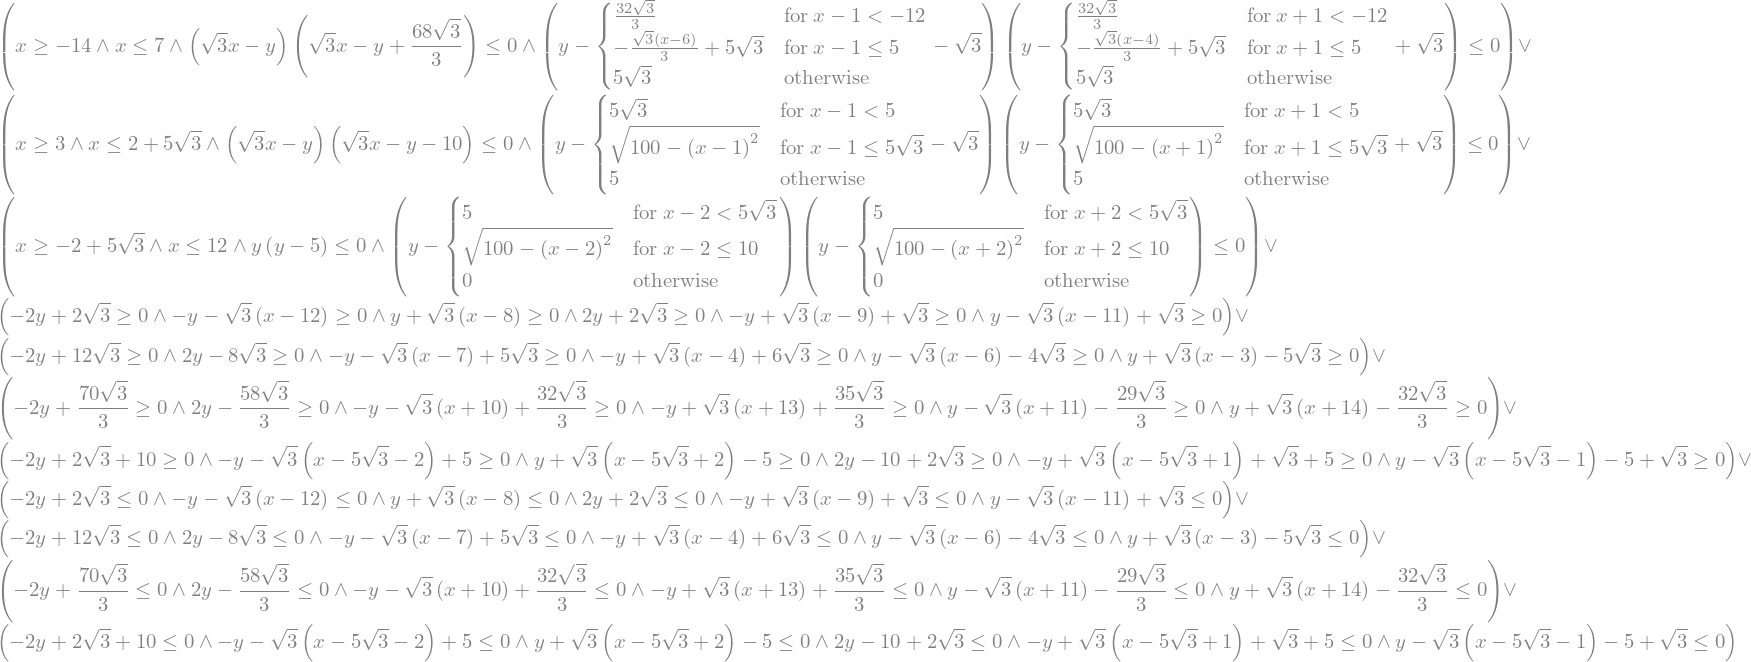

In [49]:
example_name = "Top-Down UAV Trajectory"

cond = plot_safe_grid_piecewise(
    x, y,
    hexagon,
    traj_piecewise,
    domain = domain, 
)
cond

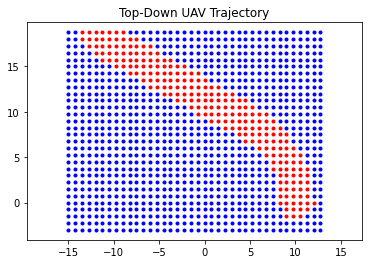


Show[
    RegionPlot[((-2*y + 2*Sqrt[3] >= 0) && (y + Sqrt[3]*(x - 8) >= 0) && (2*y + 2*Sqrt[3] >= 0) && (-y - Sqrt[3]*(x - 12) >= 0) && (y - Sqrt[3]*(x - 11) + Sqrt[3] >= 0) && (-y + Sqrt[3]*(x - 9) + Sqrt[3] >= 0)) || ((-2*y + 2*Sqrt[3] <= 0) && (y + Sqrt[3]*(x - 8) <= 0) && (2*y + 2*Sqrt[3] <= 0) && (-y - Sqrt[3]*(x - 12) <= 0) && (y - Sqrt[3]*(x - 11) + Sqrt[3] <= 0) && (-y + Sqrt[3]*(x - 9) + Sqrt[3] <= 0)) || ((-2*y + 12*Sqrt[3] >= 0) && (2*y - 8*Sqrt[3] >= 0) && (y + Sqrt[3]*(x - 3) - 5*Sqrt[3] >= 0) && (y - Sqrt[3]*(x - 6) - 4*Sqrt[3] >= 0) && (-y + Sqrt[3]*(x - 4) + 6*Sqrt[3] >= 0) && (-y - Sqrt[3]*(x - 7) + 5*Sqrt[3] >= 0)) || ((-2*y + 70*Sqrt[3]/3 >= 0) && (2*y - 58*Sqrt[3]/3 >= 0) && (y + Sqrt[3]*(x + 14) - 32*Sqrt[3]/3 >= 0) && (y - Sqrt[3]*(x + 11) - 29*Sqrt[3]/3 >= 0) && (-y + Sqrt[3]*(x + 13) + 35*Sqrt[3]/3 >= 0) && (-y - Sqrt[3]*(x + 10) + 32*Sqrt[3]/3 >= 0)) || ((-2*y + 12*Sqrt[3] <= 0) && (2*y - 8*Sqrt[3] <= 0) && (y + Sqrt[3]*(x - 3) - 5*Sqrt[3] <= 0) && (y - Sqrt[

In [50]:
plot_condition(x, y, cond, xbounds, ybounds, title=example_name, resolution=0.75)
mathematica_output = print_mathematica(x, y, cond, xbounds, ybounds, traj_piecewise, hexagon)
print(mathematica_output)

# Short Examples

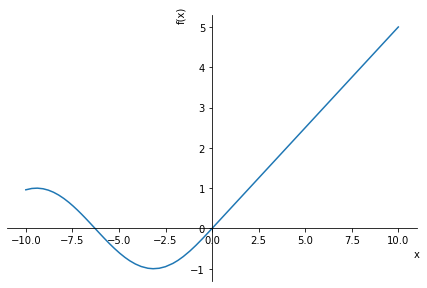

In [11]:
w = 0.5
square_points: list = [
    geometry.Point(val) for val in [[w, -w], [w, w], [-w, w], [-w, -w]]
]
square: geometry.Polygon = Polygon(*square_points)

traj_piecewise = Piecewise(
                    (sin(x/2), x < 0),
                    (x/2, x >= 0))
plot(traj_piecewise)

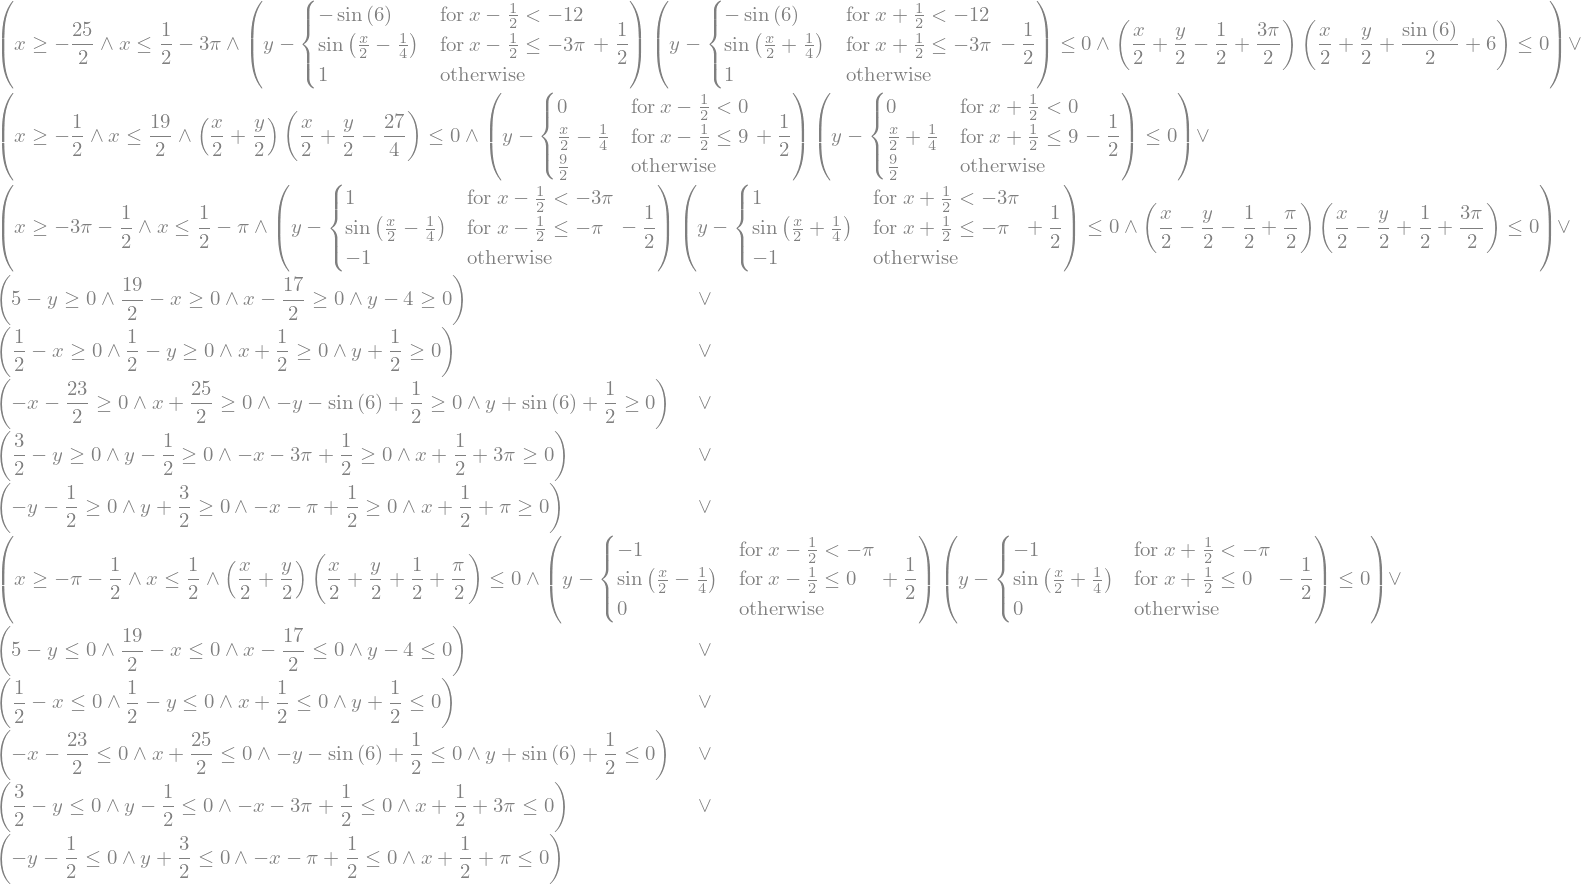

In [13]:
domain = Interval(-12, 9)
xbounds = [-15, 12]
ybounds = [-3, 9]

cond = plot_safe_grid_piecewise(
    x,
    y,
    square,
    traj_piecewise,
    domain,
)

cond

In [ ]:
plot_condition(x, y, cond, xbounds, ybounds, title=example_name)
mathematica_output = print_mathematica(x, y, cond, xbounds, ybounds, traj_piecewise, square, False)
print(mathematica_output)

## Testing $x = f(y)$

In [ ]:
square: geometry.Polygon = Polygon(*square_points)
plot_polygon(square)

domain = Interval(0, 10)
traj_piecewise = Piecewise((4*sqrt(y), y < 1), (2*y + 2, y >= 1))
# plot_implicit(traj_piecewise)

In [ ]:
plot(traj_piecewise)

In [ ]:
plot_implicit(Eq(x, 2*y + 2))

In [ ]:
plot_implicit(Eq(x, 4*sqrt(y)))

In [ ]:
domain = Interval(0, 15)
xbounds = [-2, 15]
ybounds = [-3, 9]

plot_safe_grid_piecewise(
    x,
    y,
    square,
    traj_piecewise,
    xbounds,
    ybounds,
    "Sin trajectory with square and notch check",
    domain,
    resolution=0.5,
)

In [ ]:
cond = plot_safe_grid_piecewise(
    x,
    y,
    hexagon,
    4*sqrt(y),
    xbounds,
    ybounds,
    "Sin trajectory with square and notch check",
    domain,
    resolution=0.5,
)
cond

In [ ]:
mathematica_command = print_mathematica(x, y, cond, xbounds, ybounds, 4*sqrt(y), hexagon)

In [ ]:
plot_condition(x, y, cond, xbounds, ybounds, resolution=0.75, title="test")

In [ ]:
diff(x**2 / 16, x).subs(x, 8*sqrt(3))

In [ ]:
plot_polygon(hexagon)  # side is 60 deg indeed

In [ ]:
diff(x**2 / 16, x)

In [ ]:
1 / diff(4*sqrt(y), y)

In [ ]:
x_val = 8
y_val = (x**2 / 16).subs(x, x_val)
y_val

In [ ]:
(4 * sqrt(y)).subs(y, y_val) == x_val

In [ ]:
diff(x**2 / 16, x).subs(x, x_val) == (1 / diff(4*sqrt(y), y)).subs(y, y_val)

In [ ]:
for x_val in np.arange(0, 100):
    y_val = (x**2 / 16).subs(x, x_val)
    if (4 * sqrt(y)).subs(y, y_val) != x_val or diff(x**2 / 16, x).subs(x, x_val) != (1 / diff(4*sqrt(y), y)).subs(y, y_val):
            print(x_val, y_val)

In [ ]:
if None:
    print("test")